# 1. Importación de los datos (1 punto):

Un fichero de datos se ha colocado en el área de recursos, dentro de la carpeta con nombre "Práctica".
Se ha de importar el fichero excel (primera hoja) que contiene datos de ligas europeas de fútbol de este año.
Los campos relevantes de dicho set de datos son:

- 'Date': contiene la fecha de cada partido.
- 'HTHG': Goles marcados por el equipo de casa en el descanso ('Half time')
- 'HTAG': Igual que el anterior pero para el equipo de fuera.
- 'FTHG': Goles marcados por el equipo de casa al final del partido ('Full time')
- 'FTAG': Igual que el anterior para el equipo de fuera.

Una vez realizada la lectura de los datos e inserción en un dataframe pandas se ha de convertir la variable 'Date' a formato datetime


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('all-euro-data-2020-2021.xlsx') # importa el data set, no hace falta especificar nada más ya que por defecto importa la  hoja
df.head() #para ver que pinta tiene

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,2020-09-12,12:30:00,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,2020-09-12,15:00:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,2020-09-12,17:30:00,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,2020-09-12,20:00:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,2020-09-13,14:00:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [4]:
df2 = pd.DataFrame()
df2['Date'] = pd.to_datetime(df['Date']) # de un tirón ya creamos la serie date con tipo datetime
df2['HTHG'] = df['HTHG']
df2['HTAG'] = df['HTAG']
df2['FTHG'] = df['FTHG']
df2['FTAG'] = df['FTAG']

df2.head() #mostramos la cabecera del dataframe con las columnas que nos interesan

,Date,HTHG,HTAG,FTHG,FTAG
0,2020-09-12,0,1,0,3
1,2020-09-12,1,0,1,0
2,2020-09-12,3,2,4,3
3,2020-09-12,0,0,0,2
4,2020-09-13,0,0,0,3


In [5]:
df2.dtypes #Comprobamos que la fecha está en formato datetime

Date    datetime64[ns]
HTHG             int64
HTAG             int64
FTHG             int64
FTAG             int64
dtype: object

# 2. Formamos una serie temporal en formato pd.Series (1 punto)

Se elige la variable ' FTHG' y se forma una serie temporal siguiendo los siguientes pasos:
- Se agrega la información en un nuevo dataframe pandas usando groupby, y agregando por variable 'Date', promediando los valores del resto de variables.
- Formamos una serie pandas con el constructor pd.Series() a partir del filtro que hagamos para la variable 'FTHG' en el dataframe agrupado por fecha. Es decir, realizamos un filtro para capturar en el dataframe unicamente la información de la variable 'FTHG'.
Los valores de ese filtro han de pasarse al constructor pd.Series(). Hay que comprobar que la naturaleza del objeto resultante es pd.Series, para que no de errores en las librerías que vamos a usar posteriormente.

In [6]:
df3 = df2.groupby(by = 'Date').mean() #agrupamos en un nuevo df por fecha y promediamos los valores
df3.head()

,HTHG,HTAG,FTHG,FTAG
Date,,,,
2020-09-12,1.00,0.75,1.25,2.00
2020-09-13,0.00,0.00,0.00,2.00
2020-09-14,0.00,1.50,0.50,2.50
2020-09-19,1.25,1.00,3.00,2.25
2020-09-20,0.50,1.00,1.50,3.00


In [7]:
serie1 = pd.Series(df3['FTHG'])
serie1

Date
2020-09-12    1.250000
2020-09-13    0.000000
2020-09-14    0.500000
2020-09-19    3.000000
2020-09-20    1.500000
                ...   
2021-05-15    1.333333
2021-05-16    1.500000
2021-05-18    1.500000
2021-05-19    0.833333
2021-05-23    2.100000
Name: FTHG, Length: 135, dtype: float64

In [8]:
type(serie1) #comprobamos que el objeto es una Serie de pandas

pandas.core.series.Series

# 3. Creamos una función que haga la descomposición trend, seasonal y residuo (2 puntos)

- Dicha función ha de hacer la descomposición en tres señales (trend, seasonal y residuo) de una serie temporal. La función tendrá un parámetro (la serie temporal) y devolverá como  resultado [trend,season,resid] las tres componentes. 
- Adicionalmente dibujará dentro de la función dichas componentes.

Guia: añadid a la función decompose el parámetro freq=7:
decompose(ts,freq=7) donde ts es la serie temporal. 

- El archivo no tiene un muestreo cte, con esto le estamos diciendo que queremos un muestreo semanal. Sin ese parámetro la función dará error debido a un muestreo no cte.
- Dentro de la función eliminad los nulos generados en la descomposición antes de devolver las señales a la salida. Si no se limpian los nulos funciones posteriores darán error.

### 3.1 Primero comporbamos con el test de df que la serie es estacionaria

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose as season
import seaborn as sns
import matplotlib.pyplot as plt
#Importamos las librería que nos van a permitir descomponer en series temporales y poder graficar

C:\Users\juanh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:

def descomposicion(Serie):
    
    out = season(Serie, freq = 7) #usamos period en vez de freq ya que este último está en desuso (aunque funciona igual)
    
    seasonal = out.seasonal #Extraemos del resultado la componente estacional
    trend = out.trend #Extraemos del resultado la componente de tendencia
    resid = out.resid #Extraemos del resultado la componente residual
    
    # Eliminamos los valores nulos antes de devolver el resultado y graficarlo
    seasonal.dropna(inplace = True) 
    trend.dropna(inplace = True)
    resid.dropna(inplace = True)
 
    #Graficamos usando un subplot con matplotlib
    plt.figure(figsize=(15,15))
    plt.subplot(411)
    plt.title('Serie original')
    plt.plot(Serie)
    plt.subplot(412)
    plt.title('Tendencia')
    plt.plot(trend)
    plt.subplot(413)
    plt.title('Estacional')
    plt.plot(seasonal)
    plt.subplot(414)
    plt.title('Residuo')
    plt.plot(resid)
    plt.show()
    
    resultado = [trend, seasonal, resid] #creamos una lista donde almacenamos todas estas variable para trabajar después con ellas
    return(resultado) # devolvemos la lista con los valores de la descomposición


# 4. Aplicamos la función a la variable 'FTHG' (1 punto)

- Una vez construida la función del punto anterior se aplicará dicha función a la serie temporal que habíamos construido con la variable 'FTHG'.

C:\Users\juanh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


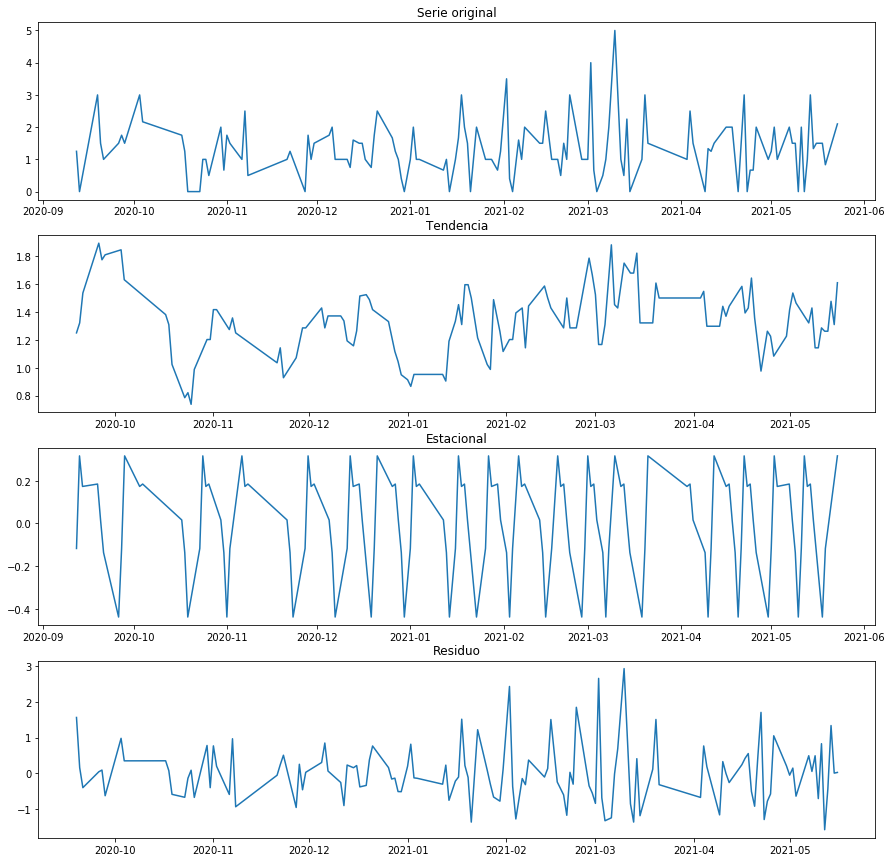

In [13]:
desc = descomposicion(serie1)

# 5. Aplicamos el test df al residuo para ver si es estacionario (1 punto)

- Como la función ejecutada devuelte, entre otras, la componente resíduo debemos utilizar esa señal que nos ha dado la función para aplicar el test DF (Dickey-Fuller)

In [14]:
from statsmodels.tsa.stattools import adfuller as df

In [15]:
residuo = desc[2] #accedemos a la tercera posición de la lista que es la que contiene el resultado del residuo

In [16]:
result=df(residuo,autolag='AIC')
print(result)
print('----------------------------------FTHG--------------------------------')
print('Estadístico',result[0])
print('P-value',result[1])
print('Valores críticos',result[4])
print()

(-7.981274509106882, 2.619431891334323e-12, 9, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, 217.99097362551967)
----------------------------------FTHG--------------------------------
Estadístico -7.981274509106882
P-value 2.619431891334323e-12
Valores críticos {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}



**El estadístico es menor que todos los valores críticos** y además el **P-value está muy por debajo de 0.05**. Por lo tanto **debemos rechazar la hipótesis nula** y concluir que la **serie ES ESTACIONARIA**. (no tenemos que realizar ninguna operación para convertir la serie en estacionaria)

# 6. Aplicamos la misma metodología a la feature 'FTAG' (1 punto)

- Es decir formamos una nueva serie temporal, descomponemos en tres señales y aplicamos el test df.
Todo el código es idéntico a lo que se ha hecho hasta este momento, salvo por el hecho de que ahora hay que hacer el filtro para una variable distinta en el punto 2.

In [17]:
serie2 = pd.Series(df3['FTAG'])
serie2

Date
2020-09-12    2.000000
2020-09-13    2.000000
2020-09-14    2.500000
2020-09-19    2.250000
2020-09-20    3.000000
                ...   
2021-05-15    2.000000
2021-05-16    1.250000
2021-05-18    1.500000
2021-05-19    1.833333
2021-05-23    1.000000
Name: FTAG, Length: 135, dtype: float64

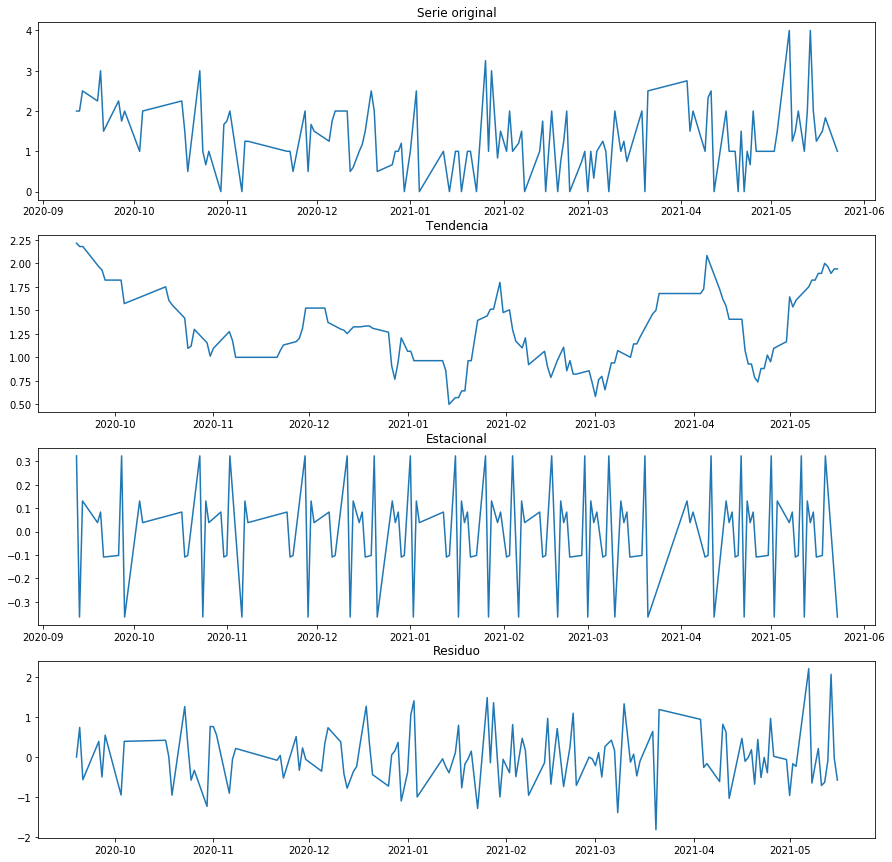

In [18]:
desc2 = descomposicion(serie2)

In [19]:
residuo2 = desc2[2]

In [20]:
result=df(residuo2,autolag='AIC')
print(result)
print('----------------------------------FTHG--------------------------------')
print('Estadístico',result[0])
print('P-value',result[1])
print('Valores críticos',result[4])
print()

(-8.08332841626809, 1.4417433276056242e-12, 6, 122, {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}, 205.69129840833287)
----------------------------------FTHG--------------------------------
Estadístico -8.08332841626809
P-value 1.4417433276056242e-12
Valores críticos {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}



**El estadístico es menor que todos los valores críticos** y además el **P-value está muy por debajo de 0.05**. Por lo tanto **debemos rechazar la hipótesis nula** y concluir que la **serie ES ESTACIONARIA**. (no tenemos que realizar ninguna operación para convertir la serie en estacionaria)

# 7. Aplicamos la misma metodología a las features 'HTHG' y  'HTAG' (1 punto)

Igual que el anterior, pero ahora aplicando el código a los goles marcados en el descanso.

In [21]:
serie3 = pd.Series(df3['HTHG'])
serie4 = pd.Series(df3['HTAG'])

print(serie3,serie4)

Date
2020-09-12    1.000000
2020-09-13    0.000000
2020-09-14    0.000000
2020-09-19    1.250000
2020-09-20    0.500000
                ...   
2021-05-15    0.333333
2021-05-16    0.750000
2021-05-18    0.250000
2021-05-19    0.500000
2021-05-23    1.100000
Name: HTHG, Length: 135, dtype: float64 Date
2020-09-12    0.750000
2020-09-13    0.000000
2020-09-14    1.500000
2020-09-19    1.000000
2020-09-20    1.000000
                ...   
2021-05-15    0.333333
2021-05-16    1.000000
2021-05-18    0.250000
2021-05-19    0.833333
2021-05-23    0.400000
Name: HTAG, Length: 135, dtype: float64


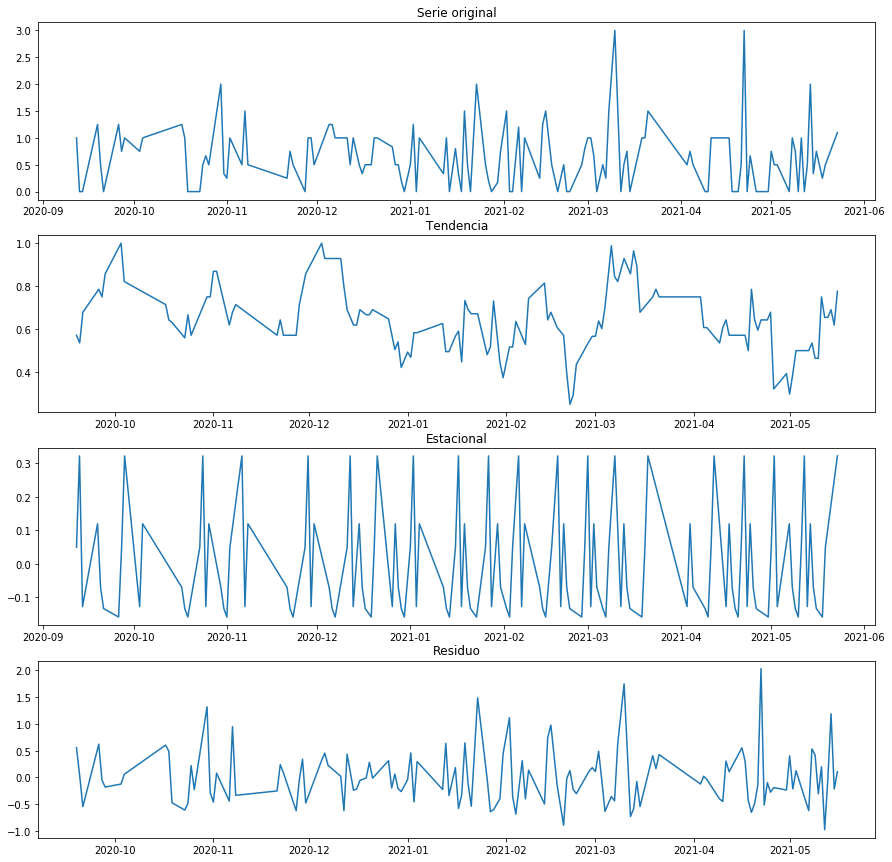

In [22]:
desc3 = descomposicion(serie3)

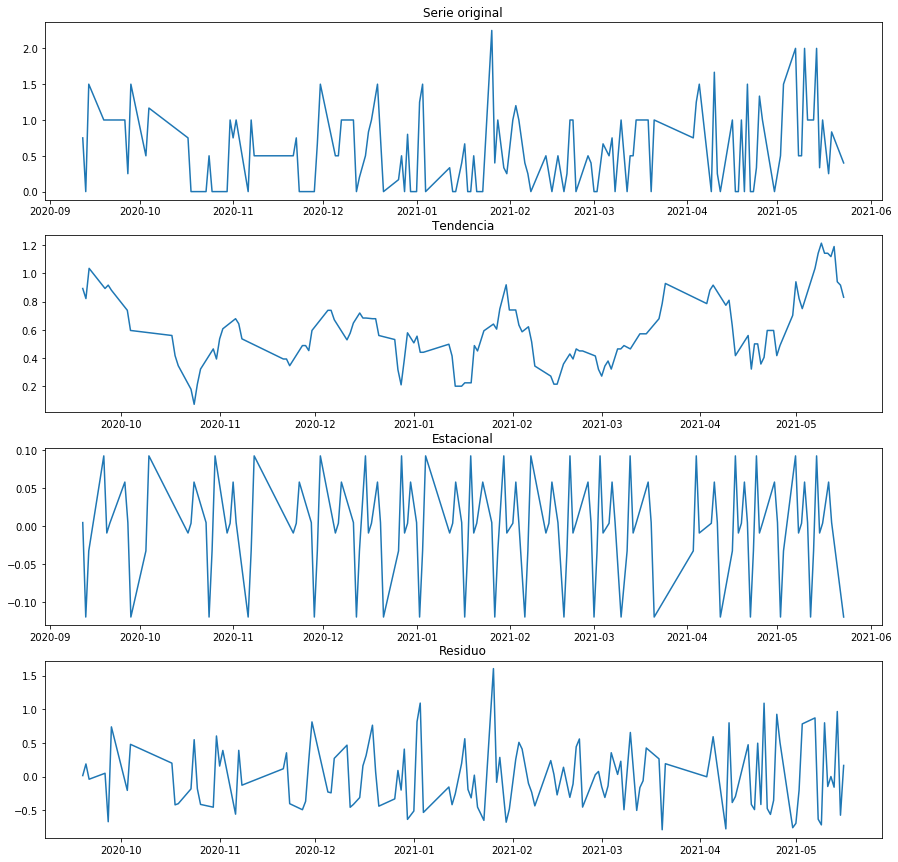

In [23]:
desc4 = descomposicion(serie4)

In [24]:
residuo3 = desc3[2]
residuo4 = desc4[2]

In [25]:
result=df(residuo3,autolag='AIC')
print('----------------------------------HTHG--------------------------------')
print('Estadístico',result[0])
print('P-value',result[1])
print('Valores críticos',result[4])
print()

result=df(residuo4,autolag='AIC')
print('----------------------------------HTAG--------------------------------')
print('Estadístico',result[0])
print('P-value',result[1])
print('Valores críticos',result[4])
print()

----------------------------------HTHG--------------------------------
Estadístico -5.972829435178522
P-value 1.918142477901587e-07
Valores críticos {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}

----------------------------------HTAG--------------------------------
Estadístico -5.259312447837872
P-value 6.644649454538232e-06
Valores críticos {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}



En ambos casos, **el estadístico es menor que todos los valores críticos** y además el **P-value está muy por debajo de 0.05**. Por lo tanto **debemos rechazar la hipótesis nula** y concluir que las **series SON ESTACIONARIAS**. (no tenemos que realizar ninguna operación para convertir la serie en estacionaria)

# 8. Discusión (2 puntos): Contesta y justifica las siguientes cuestiones.

 1. ¿Son más estacionarios los residuos de las variables a final del partido o al descanso?. Justifica tu respuesta.    
 2. ¿Encuentras alguna justificación para las diferencias encontradas?. ¿Hay algún aspecto del juego que justifique aparentemente dichas diferencias?.    
 3. ¿Dónde podríamos esperar mayor precisión de un modelo ARIMA, aplicado al descanso o a final del partido?.      
 4. Si quisiéramos entrenar un modelo ARIMA, ¿sobre qué señal de la descomposición lo aplicaríamos?. Justifica tu respuesta. 
 5. ¿Se te ocurre alguna forma de relacionar el concepto de estacionariedad en series temporales deportivas y la creación de un método de apuestas?

1. Nos fijamos en el estadístico de cada uno de ellos. FTHG: -7.98; FTAG: -8; HTHG: -5.97; HTAG: -5.26; Luego, los residuos de las variables a final del partido son más estacionarias pues a menor valor del estadístico, más estacionarios son los residuos. 

2. El aspecto del juego que justifica dichas diferencias es bastante aparente, el cansancio acumulado de los jugadores tras el descanso, puede que reduzca el rendimiento o también el cambio de jugadores después del descanso con jugadores menos expertos, o lesiones durante la primera parte, expulsiones...

**JUAN: La clave en realidad es el tiempo transcurrido. En un proceso en el tiempo hay una serie de factores potenciales que se manifestarán, en termino medio, a lo largo de dicho proceso. Cuanto más tiempo le demos al proceso más oportunidades le damos a los factores potenciales de manifestarse. Cuando el tiempo es muy corto hay mucha más variabilidad y se producen los llamados rallies (en bolsa ocurre por ejemplo) que son señales ruidosas que nada tienen que ver con la dinámica real. Sin embargo cuando al proceso se le deja más tiempo tiende poco a poco a los valores correctos que rigen su dinámica.**

3. Podríamos esperar mayor precisión del modelo ARIMA aplicado al final del partido, pues es más estacionario tal y como hemos visto en 1)

4. Si quisieramos entrenar un modelo ARIMA, lo aplicaríamos sobre la señal residuo pues sobre la tendencia no se podría hacer ya que no es estacionaria, y el modelo ARIMA requiere ser aplicado una vez se retiran la tendencia y culaquier parte periódica; y sobre la parte estacional sería más conveniente usar una modelización dada por una función periódica. 

5. A mayor estacionariedad, mayor predictibilidad de los resultados del partido. Por lo tanto, al tomar la serie temporal de los resultados históricos de un equipo, y viendo que es estacionaria, podemos esperar que tanto la media como la varianza de los resultados para el equipo sean 'constantes' en un futuro inmediato. Y usando esos valores medios, obtener predicciones en el futuro que estarían en torno a dicha media (por supuesto sin esperar que sean la media exacta). Si la serie resultara ser no-estacionaria, no podríamos hacer predicciones (apuestas) sobre los resultados futuros pues no podemos estar seguros de que la estadística que estamos viendo hasta ahora se vaya a mantener en el futuro. 